# Task 5. Linear Regression Analysis

Analyze the data on Global AI Job Market & Salary Trends 2025.

[Source](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

The file `ai_job_dataset.csv` contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| job_id | Unique identifier for each job posting |
| job_title | Standardized job title | 
| salary_usd | Annual salary in USD| 
| salary_currency | Original salary currency| 
| salary_local | Salary in local currency| 
| experience_level | EN (Entry), MI (Mid), SE (Senior), EX (Executive)| 
| employment_type |	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)| 
| company_location | Country where company is located| 	
| company_size | S (Small <50), M (Medium 50-250), L (Large >250)| 
| employee_residence |	Country where employee resides|
| remote_ratio | 0 (No remote), 50 (Hybrid), 100 (Fully remote)|
| required_skills |	Top 5 required skills (comma-separated)|
| education_required |	Minimum education requirement|
| years_experience | Required years of experience|
| industry | Industry sector of the company |
| posting_date | Date when job was posted |
| application_deadline | Application deadline |
| job_description_length | Character count of job description |
| benefits_score |	Numerical score of benefits package (1-10) |

Please complete the following tasks.

1. Select a dependent variable which represents the amount of salary. Select at least three categorical and three metric predictors. Make sure that there is no high correlation among the metric predictors and that the categorical predictors do not duplicate each other in terms of their values. If a high correlation is observed among the metric predictors, compute principal components based on them using the principal component analysis (PCA) method.

In [13]:
# your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('ai_job_dataset.csv', index_col=0)
df.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
job_id,,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [14]:
# dependent variable which represents the amount of salary - salary_usd

# so we start our analysis with it's exploration.

df['salary_usd'].describe()


count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

<Axes: xlabel='salary_usd', ylabel='Density'>

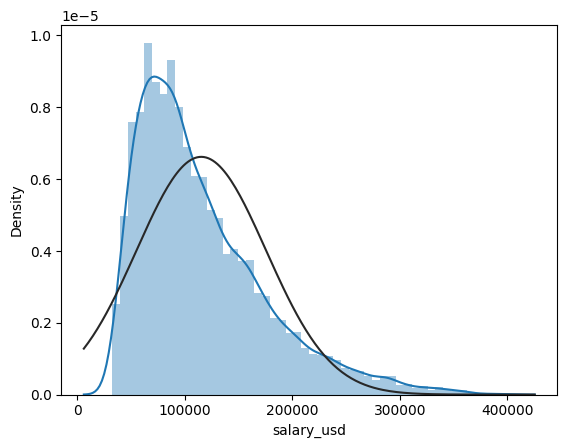

In [15]:
sns.distplot(df.salary_usd, fit=stats.norm) 

In [16]:
print('Skewness: {:.4f}'.format(df['salary_usd'].skew()))
print('Kurtosis: {:.4f}'.format(df['salary_usd'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['salary_usd'].quantile(0.75) - df['salary_usd'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['salary_usd'].quantile(0.9)/df['salary_usd'].quantile(0.1)))

Skewness: 1.2528
Kurtosis: 1.5692
Quartile Deviation: 38114.3750
Decile Ratio: 3.7526


In [17]:
stats.kstest(df.salary_usd, 'norm', args=(df.salary_usd.mean(), df.salary_usd.std()))

KstestResult(statistic=np.float64(0.106268350383037), pvalue=np.float64(5.844235961233849e-148), statistic_location=np.int64(103942), statistic_sign=np.int8(1))

The dependent variable **salary_usd** deviates from the normal distribution, is positively skewed and leptokurtic. The mean value is 115349, the standard deviation is quite high - 60261. The median is 99705, the quartile deviation is 38114, which also characterizes a rather large spread of the central 50% of values relative to the median. The decile ratio is 3.75.


Correlation matrix (numeric):


,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
salary_usd,1.000000,0.013727,0.737556,-0.009092,0.000985
remote_ratio,0.013727,1.000000,0.015321,0.004475,0.003139
years_experience,0.737556,0.015321,1.000000,-0.007526,-0.007275
job_description_length,-0.009092,0.004475,-0.007526,1.000000,0.006744
benefits_score,0.000985,0.003139,-0.007275,0.006744,1.000000


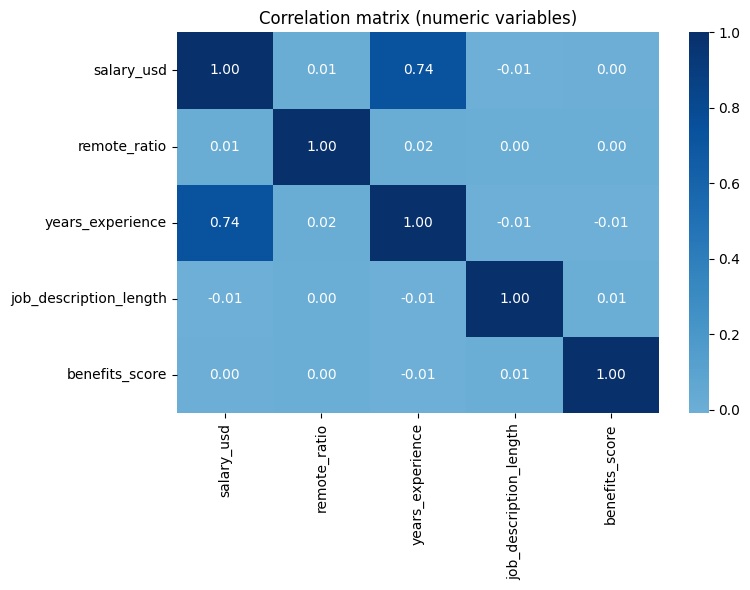

In [27]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()
print("\nCorrelation matrix (numeric):")
display(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f",  center=0, cmap='Blues')
plt.title("Correlation matrix (numeric variables)")
plt.tight_layout()
plt.show()

In [ ]:
# so lets chose these metric variables: years_experience, job_description_length, 
# benefits_score (almost same corr score as for remote ration, but looks better in current context)




Correlation among chosen metric predictors:


NameError: name 'work' is not defined

2. Formulate research hypotheses which will be verified during the data analysis.

In [19]:
# your code here

3. Build a multiple linear regression model using as predictors either the original metric variables or the principal components calculated based on them, along with the categorical predictors. Write down the regression equation. Assess the goodness-of-fit of the model.

In [20]:
# your code here

4. Assess the statistical significance of the regression coefficients. Compare them with each other in terms of the strength of their relationship with the dependent variable. Provide a detailed interpretation of the relationship between each predictor and the dependent variable. This is a very important part of the task, as it shows how each predictor is related to the dependent variable and what change in the dependent variable can be expected when the predictor’s value changes by one unit.

In [21]:
# your code here

5. Do the model diagnostics. Assess the distribution of the residuals. Is there any heteroscedasticity and why? How many outliers and/or influential observations are present in the model?

In [22]:
# your code here

6. Formulate general conclusions based on the results of the regression analysis. Which of the data analysis results were expected for you, and which were unexpected?

In [23]:
# your code here

Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional regression methods or create different specifications of the model and compare them.
- This task consists of six parts, the weight of each part in the overall assessment is as follows:
    1. 15%
    2. 5%
    3. 15%
    4. 40%
    5. 20%
    6. 5%
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 16 October 23:55. 